In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras
from numpy import array , hstack

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Jatim 2015 - 2022.csv to Jatim 2015 - 2022 (4).csv


In [3]:
data = pd.read_csv("Jatim 2015 - 2022.csv", index_col='datetime', parse_dates=['datetime'])
data.head()

,total_visitor,total_accomodation
datetime,,
2014-01-01,16870,17382
2014-02-01,16476,17592
2014-03-01,18776,18192
2014-04-01,19145,18472
2014-05-01,20299,18790


In [4]:
data.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

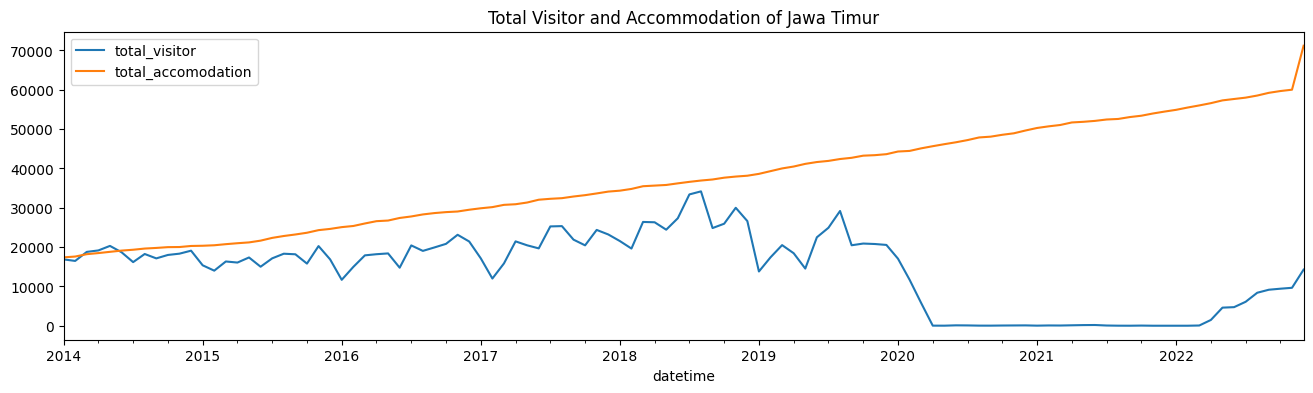

In [4]:
data.plot(figsize=(16,4),legend=True)
plt.title('Total Visitor and Accommodation of Jawa Timur')
plt.show()

In [5]:
#normalisasi biar gk bias

scaler = MinMaxScaler()

data_scaled = data.copy() #membuat salinan ke data_scaled
data_scaled["total_visitor"] = scaler.fit_transform(data_scaled["total_visitor"].values.reshape(-1,1))
data_scaled["total_accomodation"] = scaler.fit_transform(data_scaled["total_accomodation"].values.reshape(-1,1))

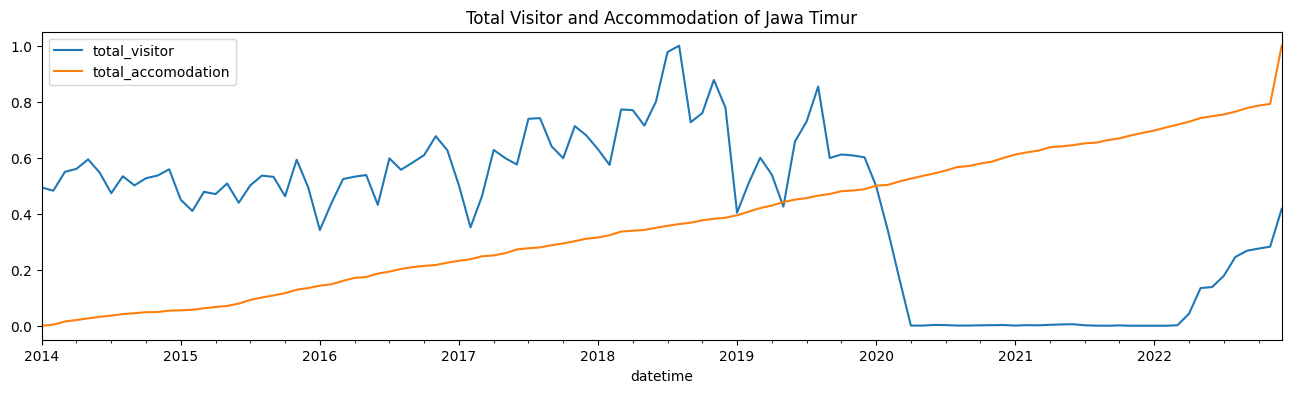

In [6]:
data_scaled.plot(figsize=(16,4),legend=True)
plt.title('Total Visitor and Accommodation of Jawa Timur')
plt.show()

In [7]:
def data_prep(data, length, split):

    X = []
    y = []

    for i in range(length, len(data)):
        X.append(data.iloc[i - length: i, 0])
        y.append(data.iloc[i, 0])

    # train-test split
    data_train = int(split* len(data))

    train_X = X[:data_train]
    train_y = y[:data_train]
    test_X = X[data_train:]
    test_y = y[data_train:]

    # converting to numpy array

    train_X = np.array(train_X)
    train_y = np.array(train_y)
    test_X = np.array(test_X)
    test_y = np.array(test_y)

    # reshaping data to required format to input to RNN models

    train_X = np.reshape(train_X, (data_train, length, 1))
    test_X = np.reshape(test_X, (test_X.shape[0], length, 1))
    return [train_X, train_y, test_X, test_y]



In [8]:
sequence_length = 12
split = 0.8
train_X_1, train_y_1, test_X_1, test_y_1 = data_prep(data_scaled,sequence_length,split)
print('train_X.shape = ',train_X_1.shape)
print('train_y.shape = ', train_y_1.shape)
print('test_X.shape = ', test_X_1.shape)
print('test_y.shape = ',test_y_1.shape)

train_X.shape =  (86, 12, 1)
train_y.shape =  (86,)
test_X.shape =  (10, 12, 1)
test_y.shape =  (10,)


In [9]:
sequence_length = 12
split= 0.7
train_X_2, train_y_2, test_X_2, test_y_2 = data_prep(data_scaled,sequence_length, split)
print('train_X.shape = ',train_X_2.shape)
print('train_y.shape = ', train_y_2.shape)
print('test_X.shape = ', test_X_2.shape)
print('test_y.shape = ',test_y_2.shape)

train_X.shape =  (75, 12, 1)
train_y.shape =  (75,)
test_X.shape =  (21, 12, 1)
test_y.shape =  (21,)


In [10]:
sequence_length = 12
split= 0.6
train_X_3, train_y_3, test_X_3, test_y_3 = data_prep(data_scaled,sequence_length, split)
print('train_X.shape = ',train_X_3.shape)
print('train_y.shape = ', train_y_3.shape)
print('test_X.shape = ', test_X_3.shape)
print('test_y.shape = ',test_y_3.shape)

train_X.shape =  (64, 12, 1)
train_y.shape =  (64,)
test_X.shape =  (32, 12, 1)
test_y.shape =  (32,)


## Model

In [12]:
model_1 = Sequential()
model_1.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(sequence_length,1)))
model_1.add(Dropout(0.15))
model_1.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model_1.add(Dropout(0.15))
model_1.add(Dense(1))

In [32]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 12, 40)            1680      
                                                                 
 dropout_3 (Dropout)         (None, 12, 40)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dropout_4 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 4961 (19.38 KB)
Trainable params: 4961 (19.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_1.compile(optimizer="adam",loss="MSE")

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_1 = model_1.fit(train_X_1, train_y_1, epochs=100, batch_size=1000, validation_data=[test_X_1, test_y_1],  # Use part of the training data as validation
   callbacks=[early_stopping])


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.1644 - val_loss: 0.0627
Epoch 2/100
1/1 [==============================] - 0s 82ms/step - loss: 0.5342 - val_loss: 0.0252
Epoch 3/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2407 - val_loss: 0.0114
Epoch 4/100
1/1 [==============================] - 0s 77ms/step - loss: 0.1943 - val_loss: 0.0121
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2627 - val_loss: 0.0125
Epoch 6/100
1/1 [==============================] - 0s 57ms/step - loss: 0.2878 - val_loss: 0.0092
Epoch 7/100
1/1 [==============================] - 0s 76ms/step - loss: 0.3265 - val_loss: 0.0059
Epoch 8/100
1/1 [==============================] - 0s 58ms/step - loss: 0.2532 - val_loss: 0.0067
Epoch 9/100
1/1 [==============================] - 0s 63ms/step - loss: 0.2160 - val_loss: 0.0135
Epoch 10/100
1/1 [==============================] - 0s 85ms/step - loss: 0.1712 - val_loss: 0.0256
Epoch 11/100
1/1 [===

In [15]:
model_2 = Sequential()
model_2.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(sequence_length,1)))
model_2.add(Dropout(0.15))
model_2.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model_2.add(Dropout(0.15))
model_2.add(Dense(1))

model_2.compile(optimizer="adam",loss="MSE")

history_2 = model_2.fit(train_X_2, train_y_2, epochs=100, batch_size=1000, validation_data=[test_X_2, test_y_2],  # Use part of the training data as validation
   callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.2610 - val_loss: 0.0123
Epoch 2/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2003 - val_loss: 0.0251
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 0.1930 - val_loss: 0.0260
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 0.1586 - val_loss: 0.0203
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 0.1946 - val_loss: 0.0147
Epoch 6/100
1/1 [==============================] - 0s 95ms/step - loss: 0.1696 - val_loss: 0.0110
Epoch 7/100
1/1 [==============================] - 0s 104ms/step - loss: 0.2202 - val_loss: 0.0084
Epoch 8/100
1/1 [==============================] - 0s 89ms/step - loss: 0.1805 - val_loss: 0.0076
Epoch 9/100
1/1 [==============================] - 0s 142ms/step - loss: 0.1311 - val_loss: 0.0078
Epoch 10/100
1/1 [==============================] - 0s 76ms/step - loss: 0.1219 - val_loss: 0.0084
Epoch 11/100
1/1 [=

In [16]:
model_3 = Sequential()
model_3.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(sequence_length,1)))
model_3.add(Dropout(0.15))
model_3.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model_3.add(Dropout(0.15))
model_3.add(Dense(1))

model_3.compile(optimizer="adam",loss="MSE")

history_3 = model_3.fit(train_X_3, train_y_3, epochs=100, batch_size=1000, validation_data=[test_X_3, test_y_3],  # Use part of the training data as validation
   callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.1164 - val_loss: 0.0417
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6131 - val_loss: 0.0898
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2436 - val_loss: 0.1938
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2120 - val_loss: 0.3011
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 0.3251 - val_loss: 0.3633
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 0.3563 - val_loss: 0.3760
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 0.4027 - val_loss: 0.3586
Epoch 8/100
1/1 [==============================] - 0s 44ms/step - loss: 0.3614 - val_loss: 0.3211
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 0.3431 - val_loss: 0.2716
Epoch 10/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2379 - val_loss: 0.2186
Epoch 11/100
1/1 [===

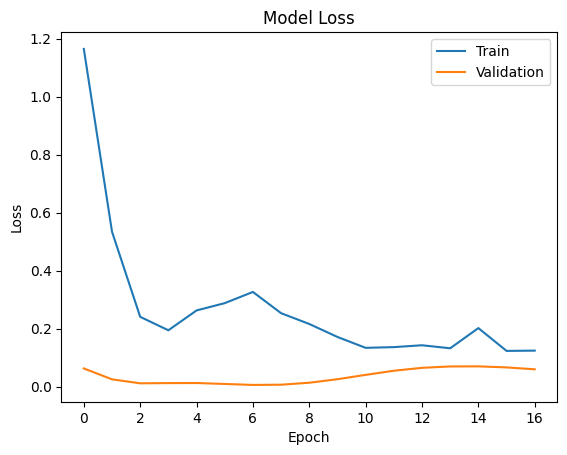

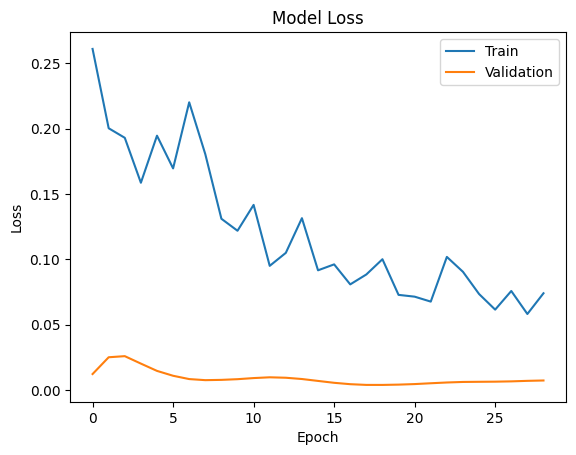

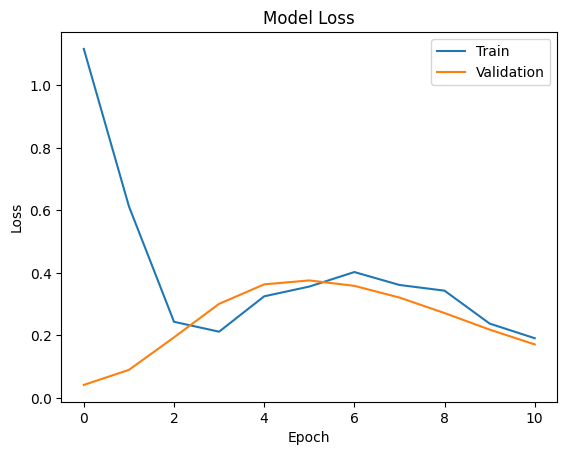

In [17]:
# Plot training & validation loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
predictions_1 = model_1.predict(test_X_1)

# Calculate evaluation metrics
mae_1 = mean_absolute_error(test_y_1, predictions_1)
mse_1 = mean_squared_error(test_y_1, predictions_1)
mape_1 = np.mean(abs((test_y_1-predictions_1)/test_y_1))*100

print("Mean Absolute Error (MAE) Skenario 1:", mae_1)
print("Mean Squared Error (MSE) Skenario 1:", mse_1)
print("Mean Absolute Percentage Error (MAPE) Skenario 1:", mape_1)

1/1 [==============================] - 0s 291ms/step
Mean Absolute Error (MAE) Skenario 1: 0.06486554005602682
Mean Squared Error (MSE) Skenario 1: 0.005895390729724998
Mean Absolute Percentage Error (MAPE) Skenario 1: 1337.2514215217122


In [19]:
predictions_2 = model_2.predict(test_X_2)

# Calculate evaluation metrics
mae_2 = mean_absolute_error(test_y_2, predictions_2)
mse_2 = mean_squared_error(test_y_2, predictions_2)
mape_2 = np.mean(abs((test_y_2-predictions_2)/test_y_2))*100

print("Mean Absolute Error (MAE) Skenario 2:", mae_2)
print("Mean Squared Error (MSE) Skenario 2:", mse_2)
print("Mean Absolute Percentage Error (MAPE) Skenario 2:", mape_2)

1/1 [==============================] - 0s 238ms/step
Mean Absolute Error (MAE) Skenario 2: 0.050125731565504976
Mean Squared Error (MSE) Skenario 2: 0.003974549122001981
Mean Absolute Percentage Error (MAPE) Skenario 2: inf


<ipython-input-19-105bdef143d0>:6: RuntimeWarning: divide by zero encountered in divide
  mape_2 = np.mean(abs((test_y_2-predictions_2)/test_y_2))*100


In [20]:
predictions_3 = model_3.predict(test_X_3)

# Calculate evaluation metrics
mae_3 = mean_absolute_error(test_y_3, predictions_3)
mse_3 = mean_squared_error(test_y_3, predictions_3)
mape_3 = np.mean(abs((test_y_3-predictions_3)/test_y_3))*100

print("Mean Absolute Error (MAE) Skenario 3 :", mae_3)
print("Mean Squared Error (MSE) Skenario 3 :", mse_3)
print("Mean Absolute Percentage Error (MAPE) Skenario 3 :", mape_3)

1/1 [==============================] - 0s 243ms/step
Mean Absolute Error (MAE) Skenario 3 : 0.15099444361243133
Mean Squared Error (MSE) Skenario 3 : 0.04171868529179561
Mean Absolute Percentage Error (MAPE) Skenario 3 : inf


<ipython-input-20-2d0e8d687e7c>:6: RuntimeWarning: divide by zero encountered in divide
  mape_3 = np.mean(abs((test_y_3-predictions_3)/test_y_3))*100


In [21]:
# Inverse transform the scaled predictions to original scale
y_pred_1 = scaler.inverse_transform(predictions_1)

# Inverse transform the original test set to compare with predictions
y_test_1 = scaler.inverse_transform(test_y_1.reshape(-1,1))

In [22]:
y_pred_2 = scaler.inverse_transform(predictions_2)
y_test_2 = scaler.inverse_transform(test_y_2.reshape(-1,1))

y_pred_3 = scaler.inverse_transform(predictions_3)
y_test_3 = scaler.inverse_transform(test_y_3.reshape(-1,1))

## Predict Next 12 Months

In [23]:
total_vis = data_scaled['total_visitor'].values
total_vis = total_vis.reshape((-1))

look_back=12

def predict(num_prediction, model):
    prediction_list = total_vis[-look_back:]

    for i in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = data_scaled.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='MS').tolist()
    return prediction_dates

In [24]:
num_prediction = 12
forecast_1 = predict(num_prediction, model_1)
forecast_dates_1 = predict_dates(num_prediction)

1/1 [==============================] - 0s 22ms/step


In [25]:
num_prediction = 12
forecast_2 = predict(num_prediction, model_2)
forecast_dates_2 = predict_dates(num_prediction)

1/1 [==============================] - 0s 22ms/step


In [26]:
num_prediction = 12
forecast_3 = predict(num_prediction, model_3)
forecast_dates_3 = predict_dates(num_prediction)

1/1 [==============================] - 0s 23ms/step


In [27]:
n_pred_1= pd.DataFrame({"prediction": forecast_1.reshape(-1)
                       }, index=forecast_dates_1)

n_pred_2= pd.DataFrame({"prediction": forecast_2.reshape(-1)
                       }, index=forecast_dates_2)

n_pred_3= pd.DataFrame({"prediction": forecast_3.reshape(-1)
                       }, index=forecast_dates_3)

In [64]:
# Inverse transform the scaled predictions to original scale
pred_1 = scaler.inverse_transform(forecast_1.reshape(-1,1))
df_pred_1= pd.DataFrame({"prediction": pred_1.reshape(-1)
                       }, index=forecast_dates_1)

In [65]:
# Inverse transform the scaled predictions to original scale

pred_2 = scaler.inverse_transform(forecast_2.reshape(-1,1))
df_pred_2= pd.DataFrame({"prediction": pred_2.reshape(-1)
                       }, index=forecast_dates_2)

pred_3 = scaler.inverse_transform(forecast_3.reshape(-1,1))
df_pred_3= pd.DataFrame({"prediction": pred_3.reshape(-1)
                       }, index=forecast_dates_3)

In [245]:
# Inverse transform the scaled predictions to original scale


In [33]:
n_pred_1

,prediction
2022-12-01,0.417491
2023-01-01,0.638828
2023-02-01,0.672898
2023-03-01,0.746570
2023-04-01,0.771111
2023-05-01,0.722453
2023-06-01,0.797498
2023-07-01,0.909328
2023-08-01,0.993707
2023-09-01,1.014232


In [34]:
n_pred_2

,prediction
2022-12-01,0.417491
2023-01-01,0.438875
2023-02-01,0.496467
2023-03-01,0.517876
2023-04-01,0.561990
2023-05-01,0.629347
2023-06-01,0.642918
2023-07-01,0.686905
2023-08-01,0.669511
2023-09-01,0.714773


In [35]:
n_pred_3

,prediction
2022-12-01,0.417491
2023-01-01,0.126885
2023-02-01,0.160900
2023-03-01,0.183332
2023-04-01,0.247361
2023-05-01,0.197934
2023-06-01,0.092747
2023-07-01,0.019995
2023-08-01,0.113628
2023-09-01,-0.029199


## Plotting

In [36]:
def plotting_actual_vs_pred(y_test, y_pred, title, y_label):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual data')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted data')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

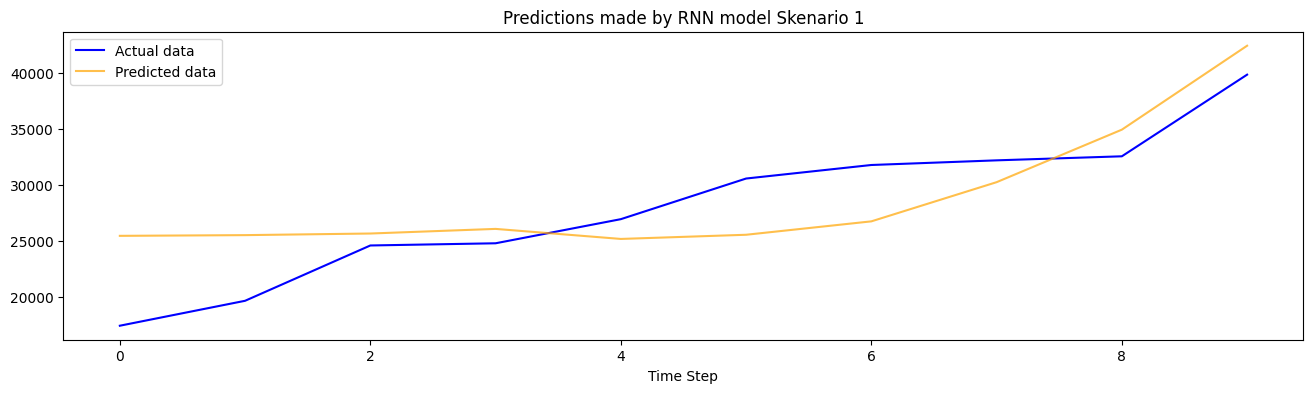

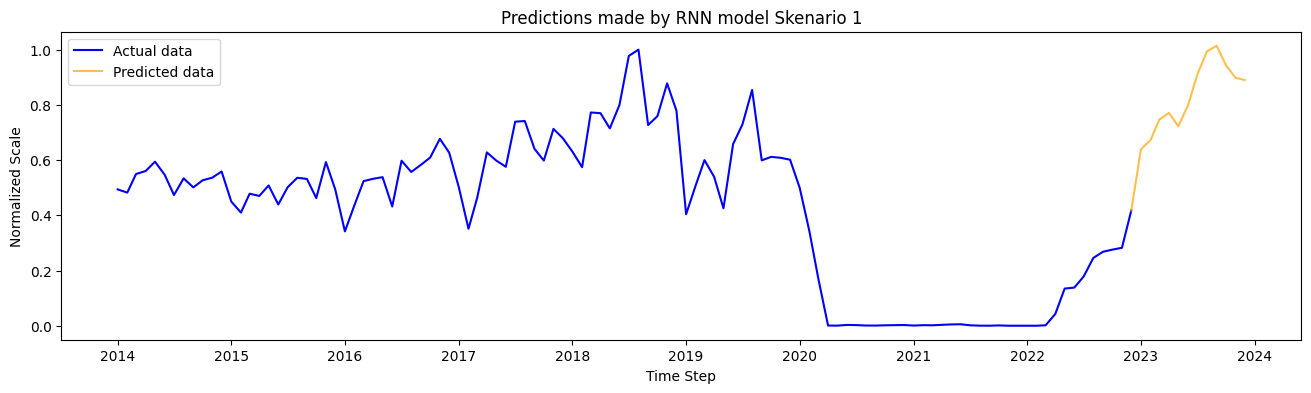

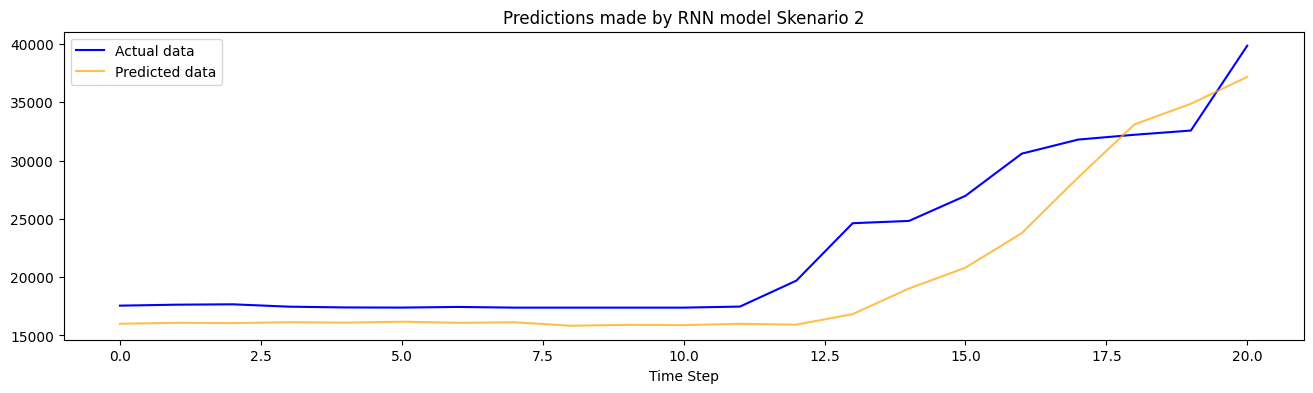

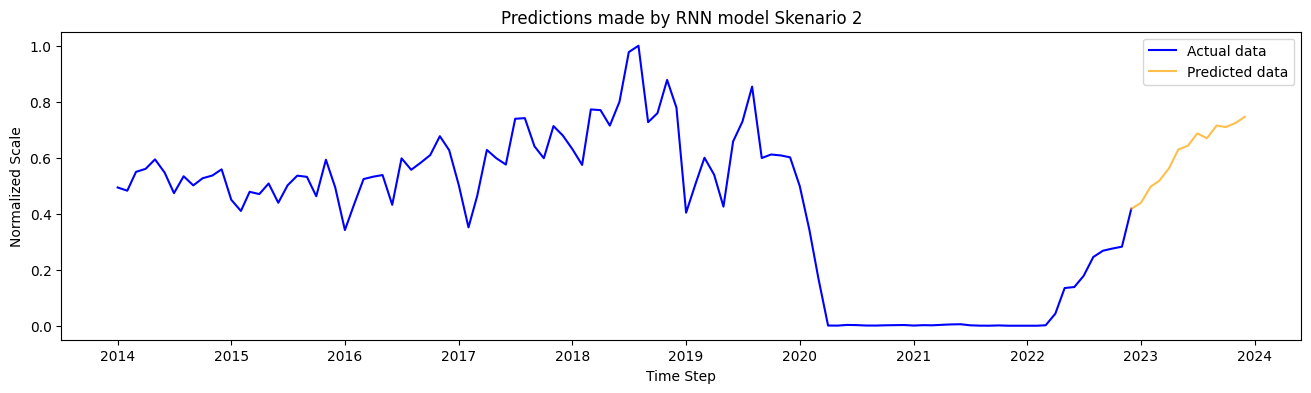

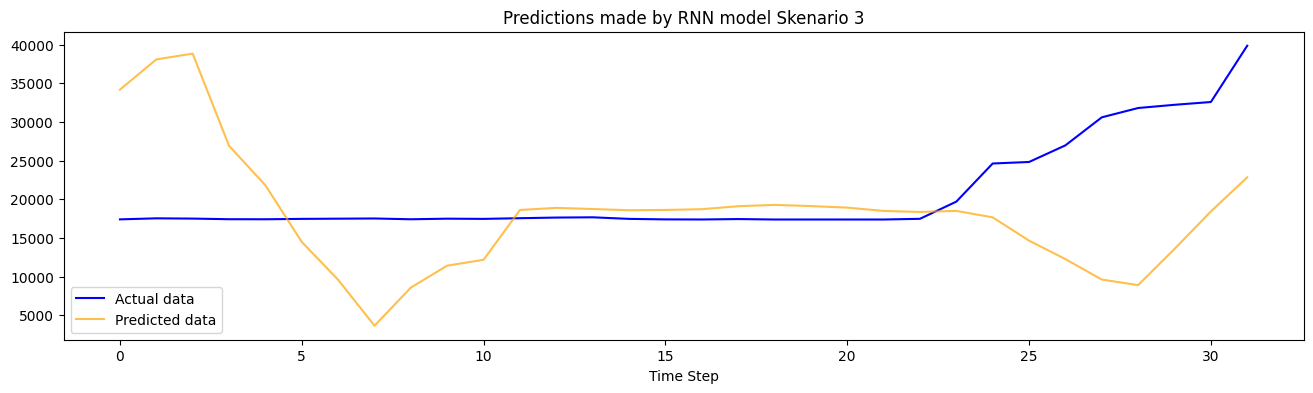

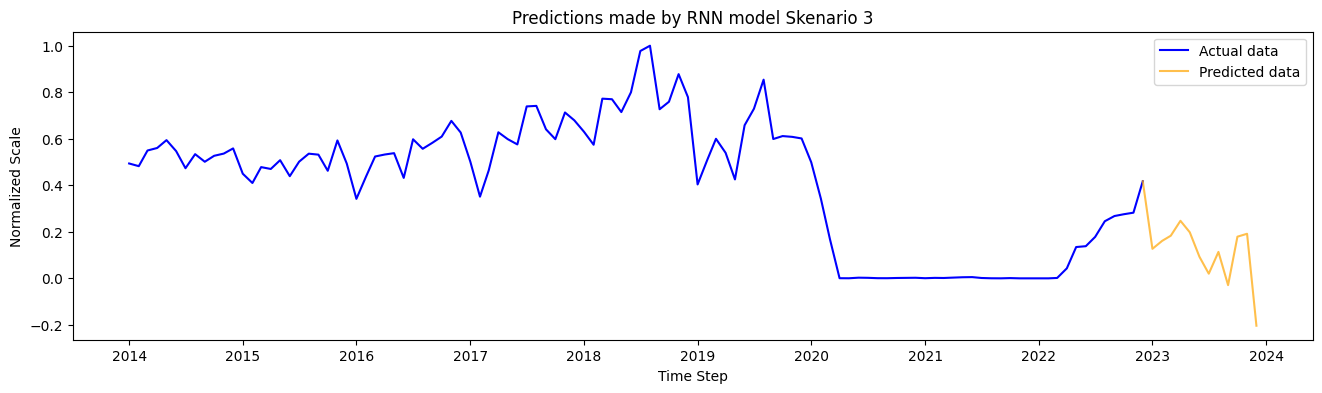

In [31]:
plotting_actual_vs_pred(y_test_1, y_pred_1, "Predictions made by RNN model Skenario 1","")
plotting_actual_vs_pred(data_scaled["total_visitor"], n_pred_1, "Predictions made by RNN model Skenario 1", "Normalized Scale")
plotting_actual_vs_pred(y_test_2, y_pred_2, "Predictions made by RNN model Skenario 2","")
plotting_actual_vs_pred(data_scaled["total_visitor"], n_pred_2, "Predictions made by RNN model Skenario 2", "Normalized Scale")
plotting_actual_vs_pred(y_test_3, y_pred_3, "Predictions made by RNN model Skenario 3","")
plotting_actual_vs_pred(data_scaled["total_visitor"], n_pred_3, "Predictions made by RNN model Skenario 3", "Normalized Scale")

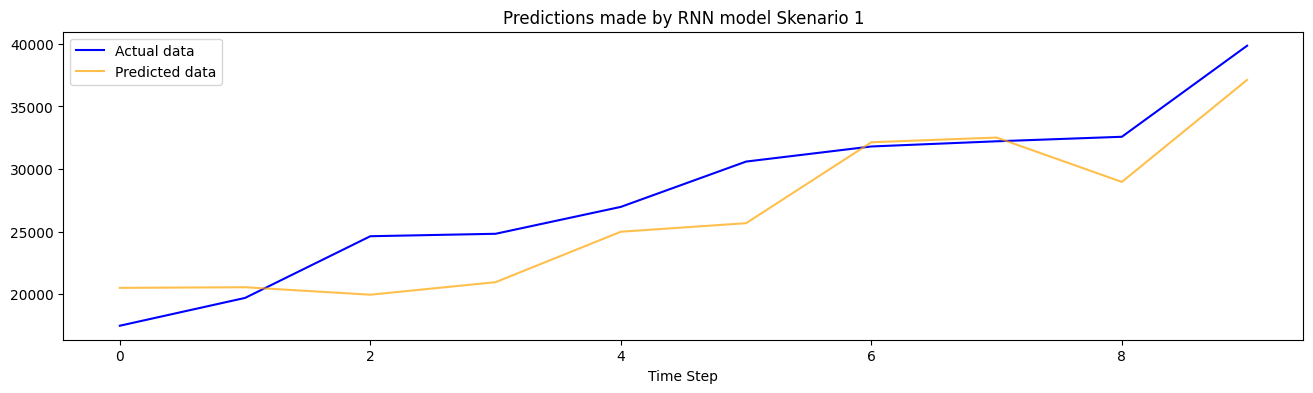

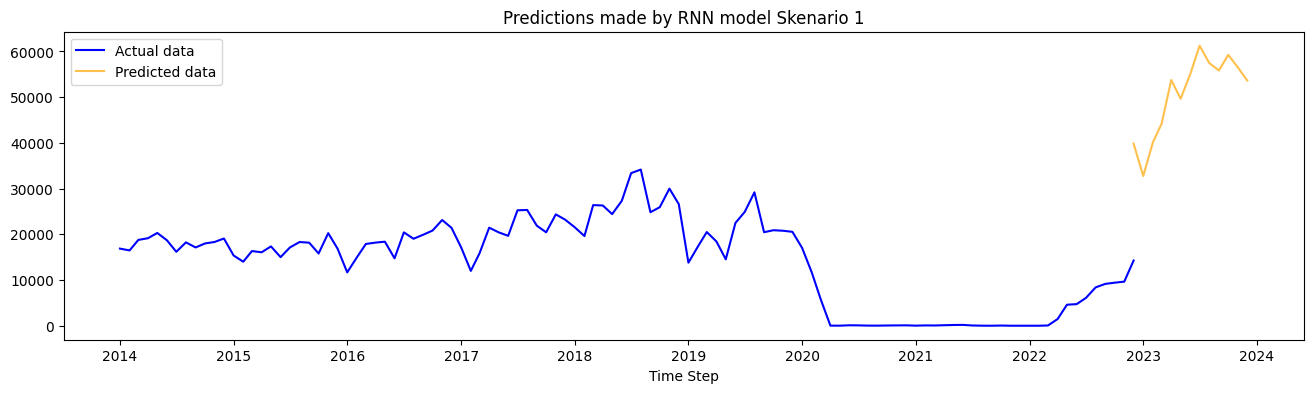

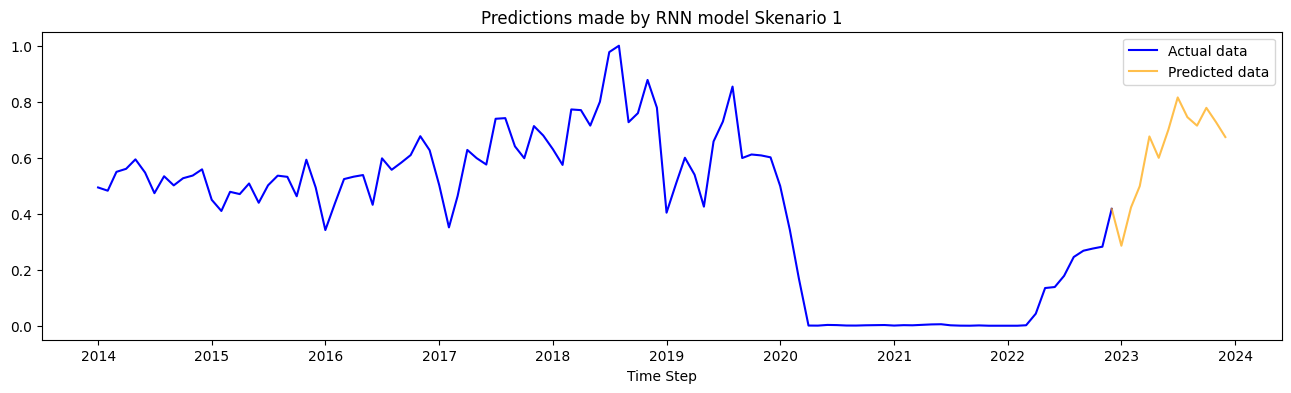

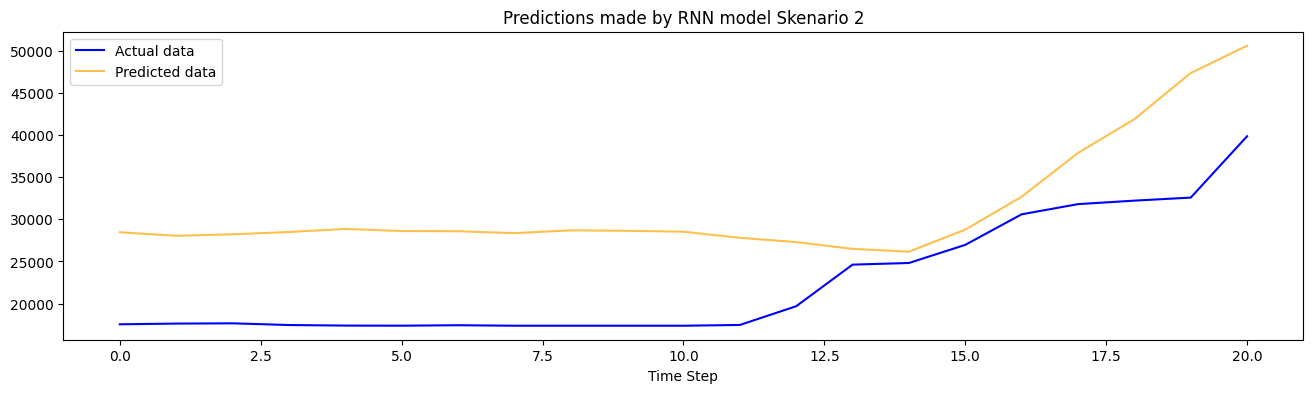

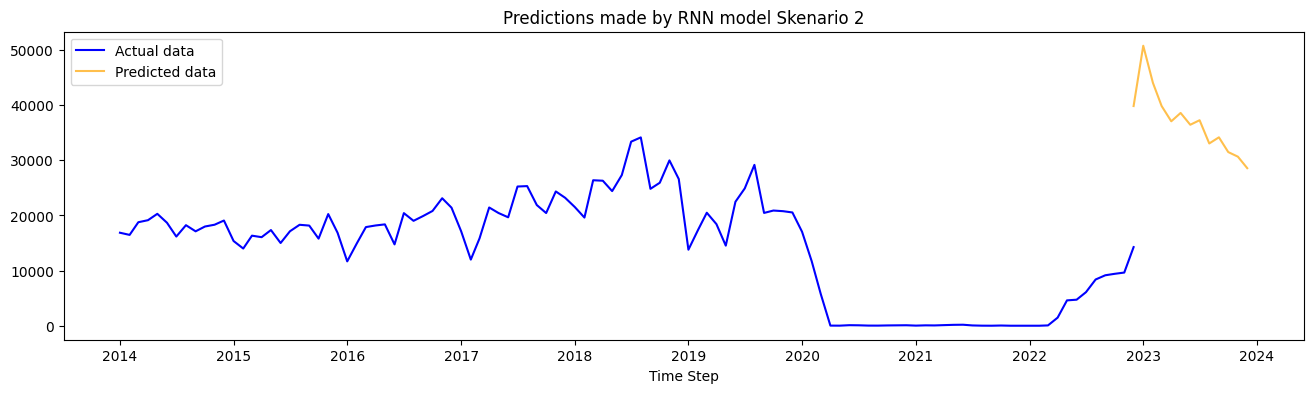

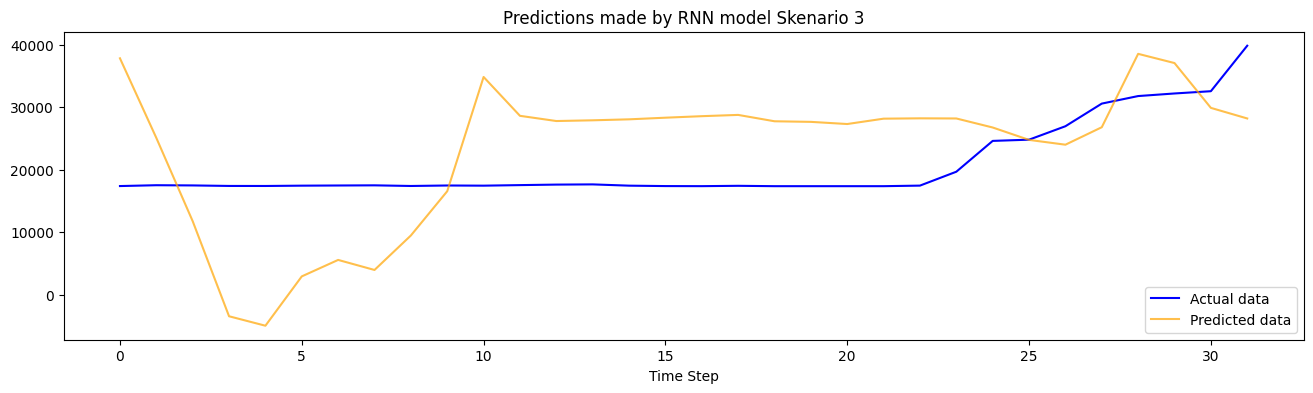

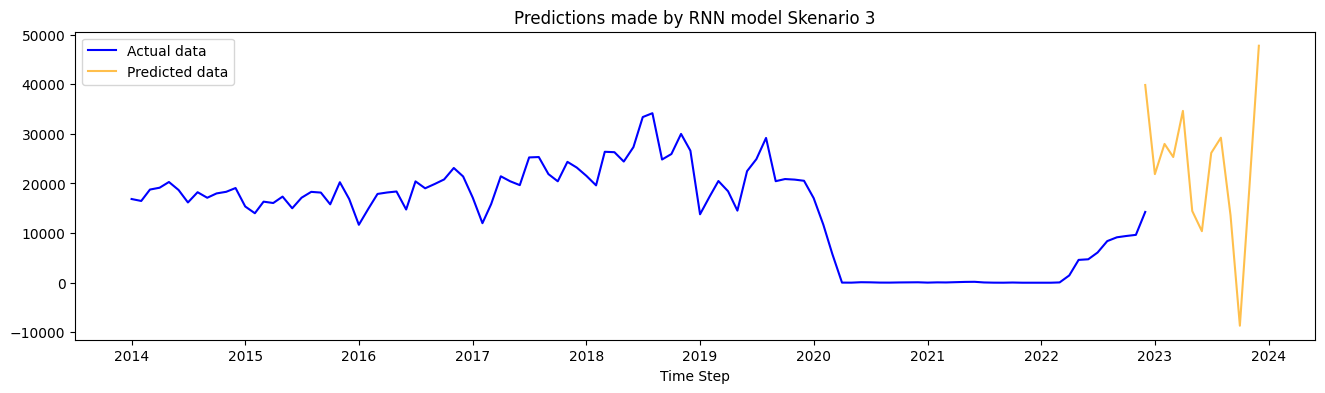

In [72]:
plotting_actual_vs_pred(y_test_1, y_pred_1, "Predictions made by RNN model Skenario 1")
plotting_actual_vs_pred(data["total_visitor"], df_pred_1, "Predictions made by RNN model Skenario 1")
plotting_actual_vs_pred(y_test_2, y_pred_2, "Predictions made by RNN model Skenario 2")
plotting_actual_vs_pred(data["total_visitor"], df_pred_2, "Predictions made by RNN model Skenario 2")
plotting_actual_vs_pred(y_test_3, y_pred_3, "Predictions made by RNN model Skenario 3")
plotting_actual_vs_pred(data["total_visitor"], df_pred_3, "Predictions made by RNN model Skenario 3")

# Summary

In [40]:
rsme_1, rsme_2, rsme_3 = np.sqrt(mse_1), np.sqrt(mse_2), np.sqrt(mse_3)

summary = pd.DataFrame({
    "Mean Absolute Error (MAE)": [mae_1,mae_2,mae_3],
    "Mean Squared Error (MSE)": [mse_1,mse_2,mse_3],
    "Root Square Absolute Error (RMSE)": [rsme_1, rsme_2, rsme_3],
    "Mean Absolute Percentage Error (MAPE)": [mape_1, mape_2, mape_3]

})

summary

,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Square Absolute Error (RMSE),Mean Absolute Percentage Error (MAPE)
0,0.064866,0.005895,0.076781,1337.251422
1,0.050126,0.003975,0.063044,inf
2,0.150994,0.041719,0.204252,inf
